<a href="https://colab.research.google.com/github/pratik-0013/pratik-0013/blob/main/Matplotlib_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## what is matplotlib ?
- Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy. As such, it offers a viable open source alternative to MATLAB. Developers can also use matplotlib’s APIs (Application Programming Interfaces) to embed plots in GUI applications.

## Why Matplotlob ?
- Built on NumPy arrays (and Python)
- integrates direactly with pandas
- Can create basic or advanded plots
- Simple to use interface (ofc once you get to know the foundations)

## What are we going to cover ?
- Matplotlib Workflow
- importing Matplotlib and the 2 ways of plotting
- Plotting data from NumPy arrays
- Plotting data from pandas DataFrames
- Custmizingg plots
- Saving and sharing plots

### importing and introduction to Matplotlib

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[]

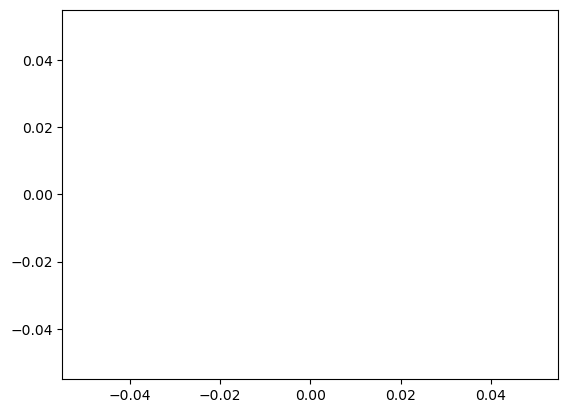

In [ ]:
plt.plot()

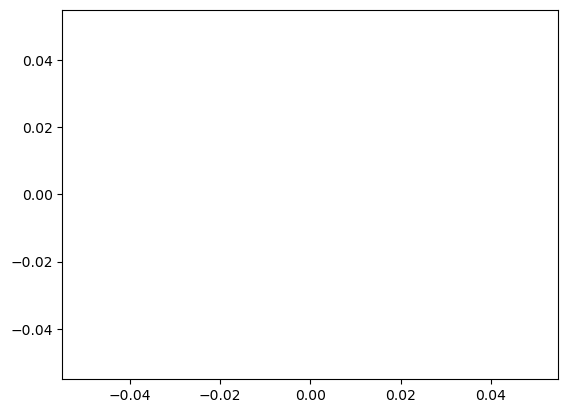

In [ ]:
plt.plot();

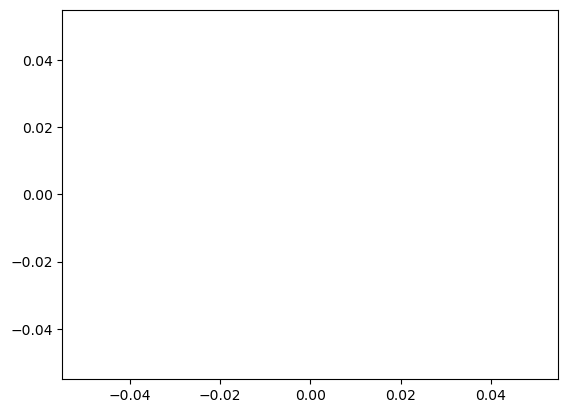

In [ ]:
plt.plot()
plt.show() # works same as plt.plot();

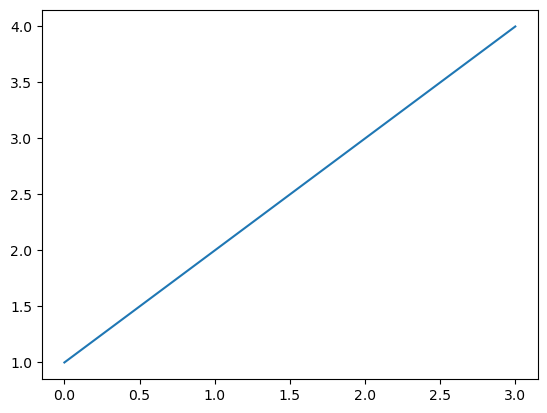

In [ ]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x);

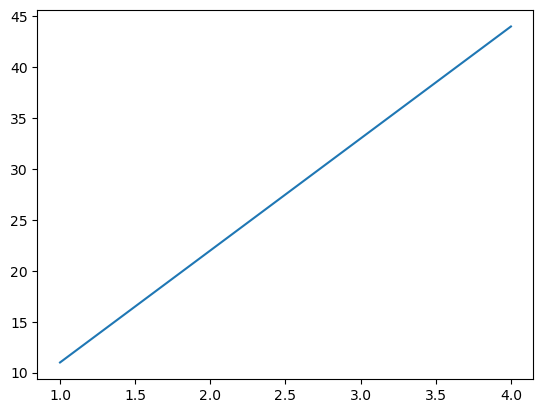

In [ ]:
plt.plot(x,y);

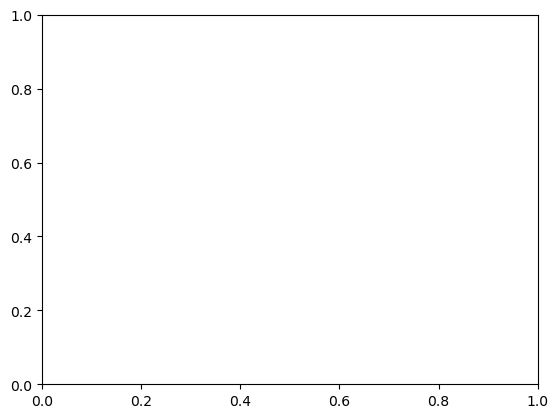

In [ ]:
# 1st method
fig = plt.figure() # Creats a figure
ax = fig.add_subplot() # adds some axes
plt.show()

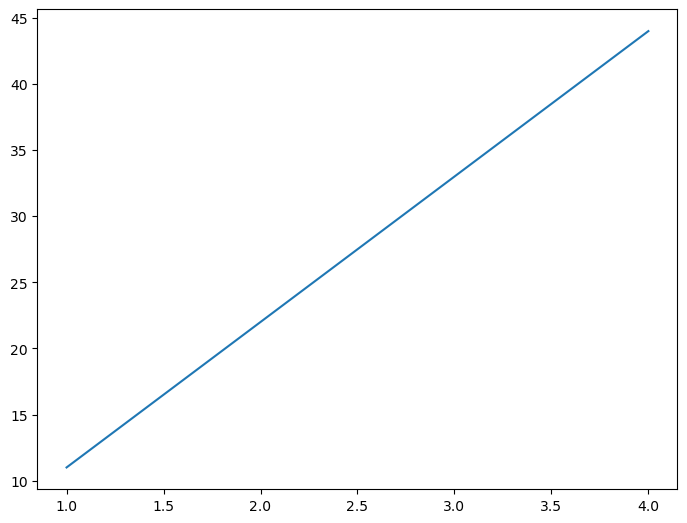

In [ ]:
# 2nd method
fig = plt.figure() # Creats a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x,y) # add some data
plt.show()

## recommended method 
- cause it used object-oriented API

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

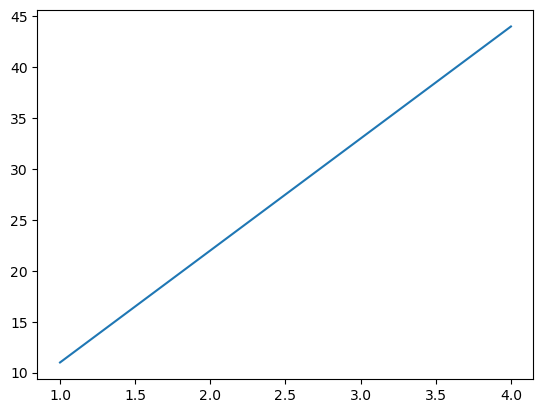

In [ ]:
# 3rd method (recommended)
fig, ax = plt.subplots() # shift + tab
ax.plot(x, y); # add some data
type(fig), type(ax)

## Anotomy of matplotlib

![](matplotlib-anatomy-of-a-plot-with-code.png)

## Matplotlib example workflow
- This is the way we plot all the time 
- probably not for 3d

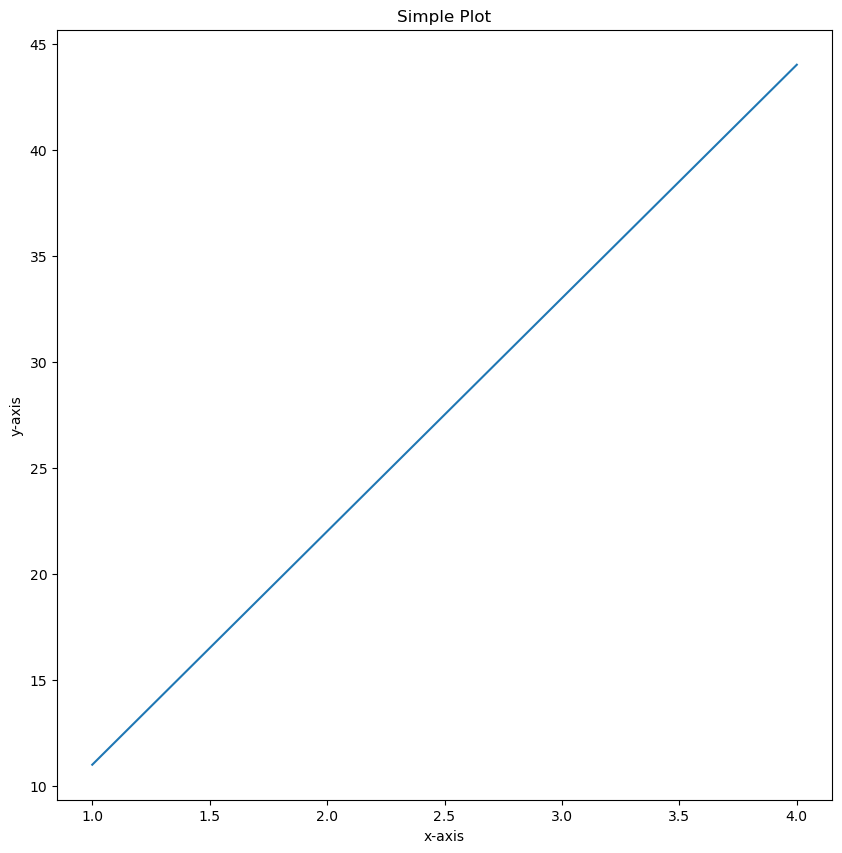

In [ ]:
# 0. import matplotlib and get it ready for plotting in jupter 
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))# (width, height)

# 3.plot data
ax.plot(x, y)

# 4.Custmize plot
ax.set(title = "Simple Plot",
      xlabel = "x-axis",
      ylabel = "y-axis")

# 5. Save & show (you save the whole figure)
fig.savefig("sample-plot.png")

## Making figures with NumPy arrays

We Learn :
- Line Plot
- Bar Plot
- Scatter Plot
- Histogram
- Subplot

These are only Basic Plot 

In [ ]:
# create some data
x = np.linspace(0,10,100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

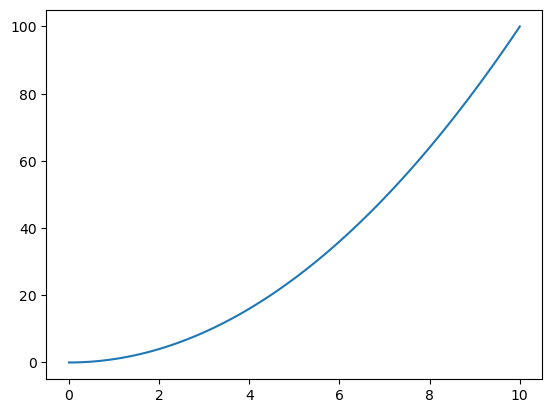

In [ ]:
# Line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);

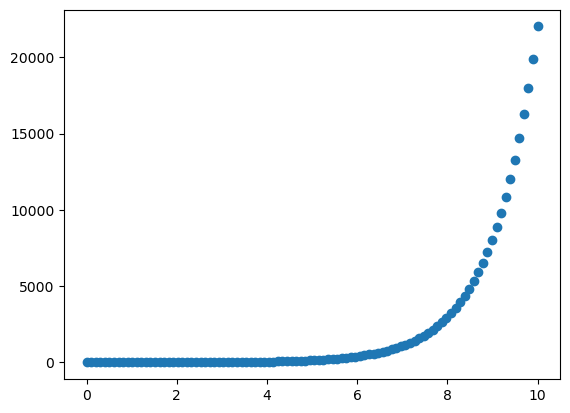

In [ ]:
# Scatter Plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

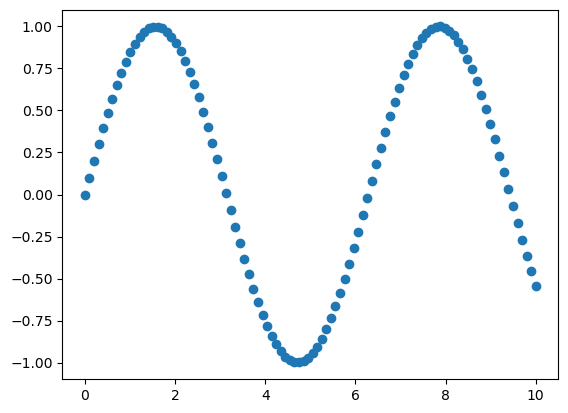

In [ ]:
# Another Scatter Plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

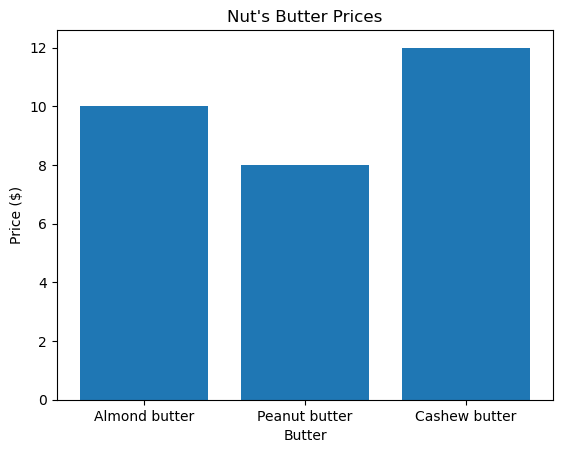

In [ ]:
# make a plot from dictionary
nut_butter_prices = {"Almond butter": 10,
                    "Peanut butter": 8,
                    "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar( nut_butter_prices.keys(),  nut_butter_prices.values()) 
ax.set(title = "Nut's Butter Prices",
      ylabel = "Price ($)",
      xlabel = "Butter");

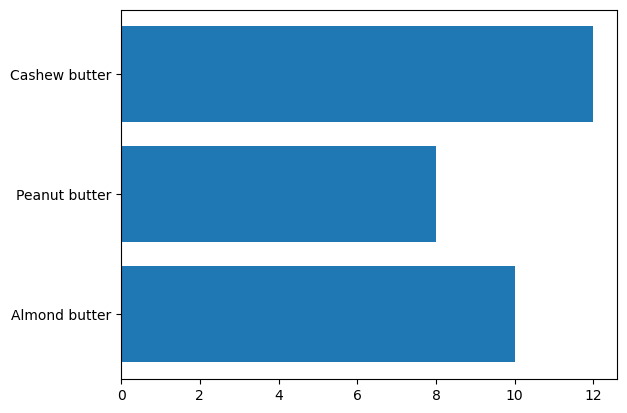

In [ ]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

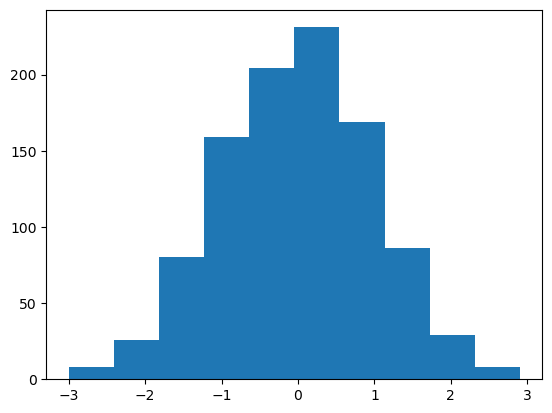

In [ ]:
# create some data for histograms 
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

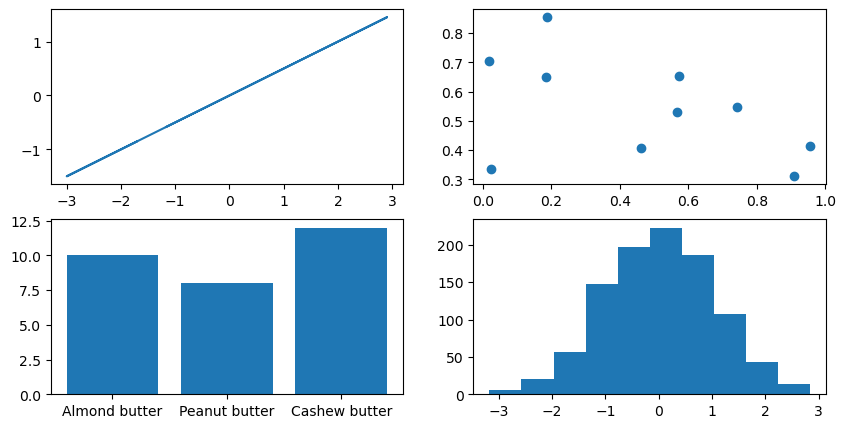

In [ ]:
# Sub plot option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2,
                                          ncols = 2,
                                          figsize=(10,5))

# Plot to each different axis
ax1.plot(x,x/2)
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax4.hist(np.random.randn(1000));

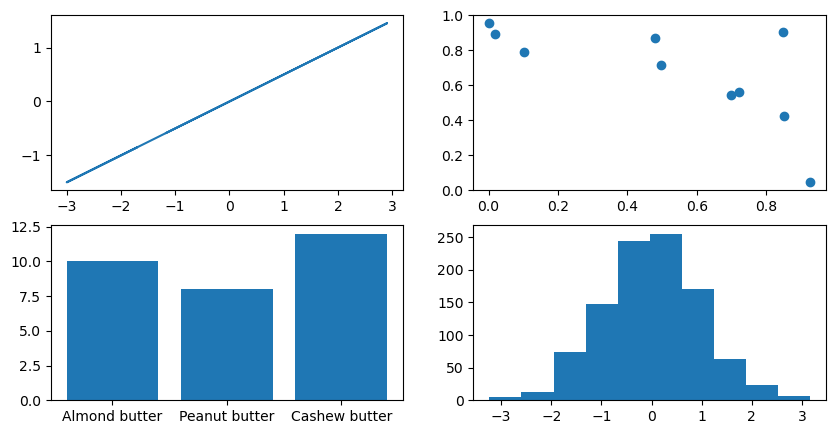

In [ ]:
# Subplots Option 2
fig, ax = plt.subplots(nrows = 2, 
                      ncols = 2, 
                      figsize = (10, 5))

# Plot to each different index
ax[0, 0].plot(x, x/2)
ax[0, 1].scatter(np.random.random(10), np.random.random(10))
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax[1, 1].hist(np.random.randn(1000));

## Plotting from pandas DataFrame

In [ ]:
car_sales = pd.read_csv("car-sales.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


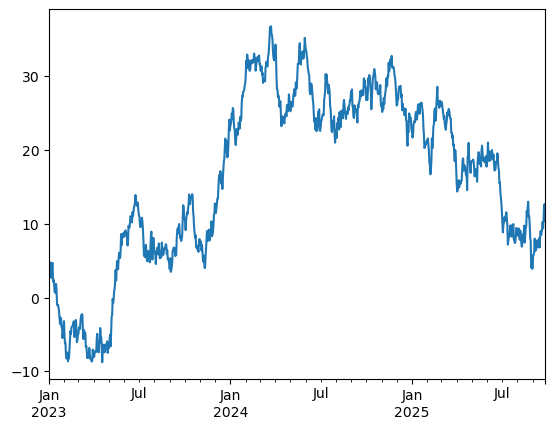

In [ ]:
ts = pd.Series(np.random.randn(1000),
               index = pd.date_range("1/1/2023", periods = 1000))
ts = ts.cumsum()
ts.plot();

In [ ]:
car_sales["Price"] = car_sales["Price"].str.replace("[\$\,\.]", "", regex=True)
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000


In [ ]:
type(car_sales["Price"][0])

str

In [ ]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales.head(2)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000


In [ ]:
car_sales["Sale Date"] = pd.date_range("1/1/2023", periods = len(car_sales))
car_sales.head(2)

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2023-01-01
1,Honda,Red,87899,4,5000,2023-01-02


In [ ]:
car_sales["Total Sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2023-01-01,4000
1,Honda,Red,87899,4,5000,2023-01-02,40005000
2,Toyota,Blue,32549,3,7000,2023-01-03,400050007000
3,BMW,Black,11179,5,22000,2023-01-04,40005000700022000
4,Nissan,White,213095,4,3500,2023-01-05,400050007000220003500
5,Toyota,Green,99213,4,4500,2023-01-06,4000500070002200035004500
6,Honda,Blue,45698,4,7500,2023-01-07,40005000700022000350045007500
7,Honda,Blue,54738,4,7000,2023-01-08,400050007000220003500450075007000
8,Toyota,White,60000,4,6250,2023-01-09,4000500070002200035004500750070006250
9,Nissan,White,31600,4,9700,2023-01-10,40005000700022000350045007500700062509700


In [ ]:
type(car_sales["Price"][0])

str

In [ ]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales.tail(2)

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
8,Toyota,White,60000,4,6250,2023-01-09,66750
9,Nissan,White,31600,4,9700,2023-01-10,76450


In [ ]:
type(car_sales["Price"][0])

str

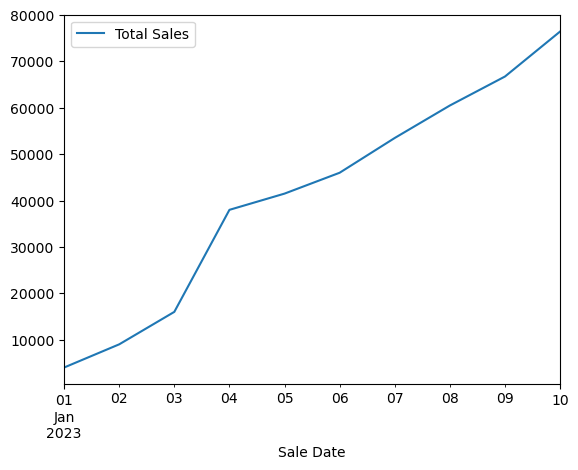

In [ ]:
# Ler's plot the total sales
car_sales.plot(x = "Sale Date", y = "Total Sales");

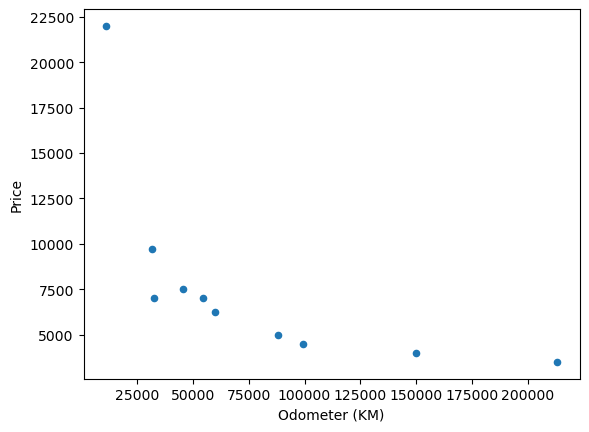

In [ ]:
# Reassign proce column to int
car_sales["Price"] = car_sales["Price"].astype(int)

# Plot scatter plot with price column as numeric 
car_sales.plot(x = "Odometer (KM)", y = "Price", kind = "scatter" );

In [ ]:
# How about a bar graph?
x = np.random.rand(10, 4)

# Turn it into a dataframe
df = pd.DataFrame(x, columns = ['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.401905,0.581355,0.098321,0.518970
1,0.845661,0.398909,0.065499,0.302567
2,0.053228,0.902423,0.570147,0.533828
3,0.690650,0.583855,0.706163,0.145077
4,0.705486,0.786639,0.976921,0.040866
5,0.283203,0.613702,0.510135,0.725134
6,0.959688,0.486682,0.633695,0.787304
7,0.449035,0.996459,0.117671,0.739085
8,0.775666,0.659144,0.225444,0.227405
9,0.409131,0.064714,0.984395,0.635565


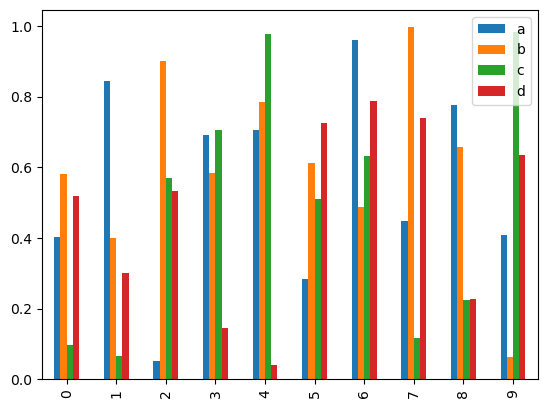

In [ ]:
df.plot.bar();

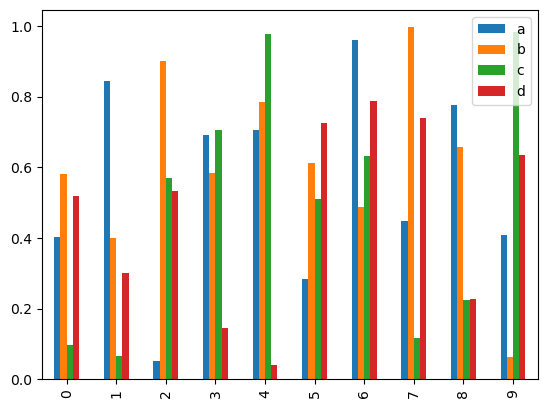

In [ ]:
df.plot(kind ="bar");

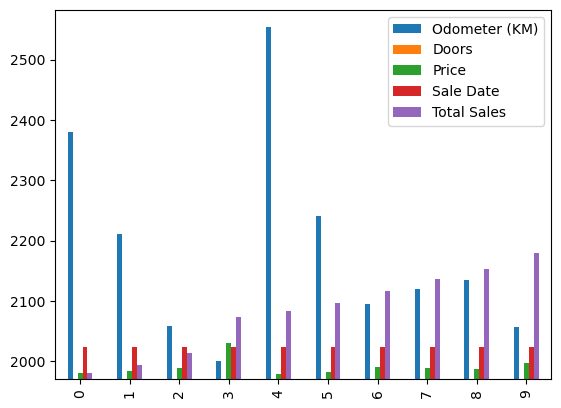

In [ ]:
car_sales.plot(kind = "bar");

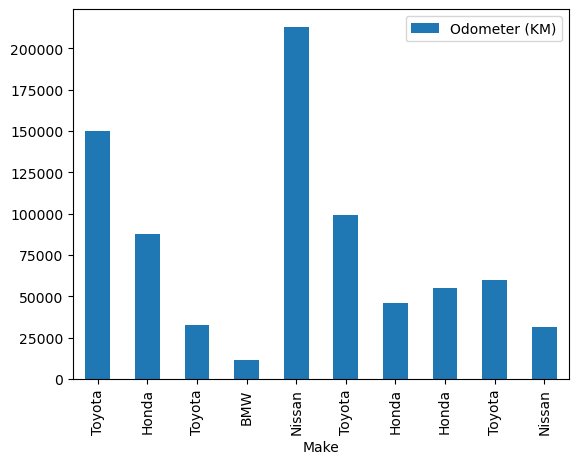

In [ ]:
car_sales.plot(x = "Make", y = "Odometer (KM)", kind = "bar");

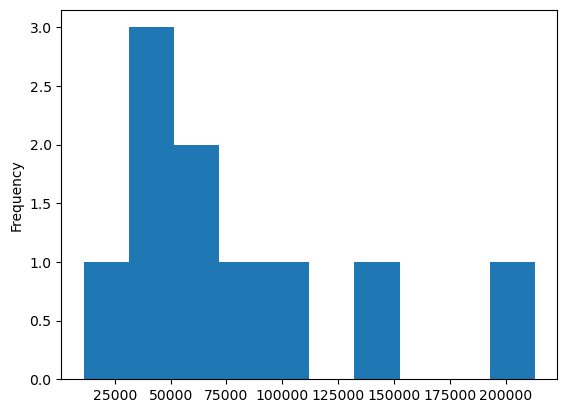

In [ ]:
# Histogram 

car_sales["Odometer (KM)"].plot(kind = "hist");

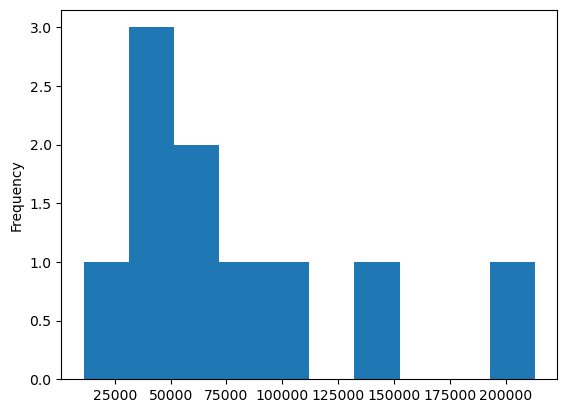

In [ ]:
car_sales["Odometer (KM)"].plot.hist(bins = 10);

In [ ]:
# Let's try on another datasets
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


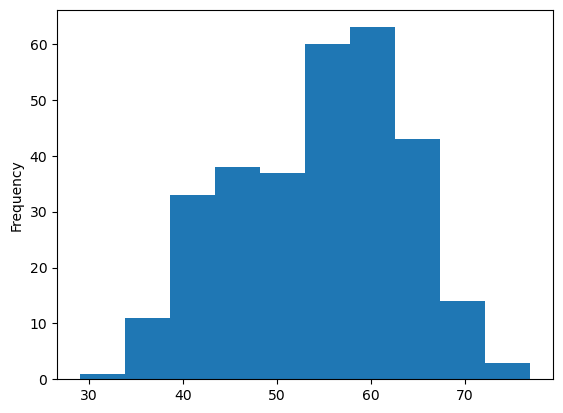

In [ ]:
# Create histogram of age
heart_disease["age"].plot.hist(bins = 10);

In [ ]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


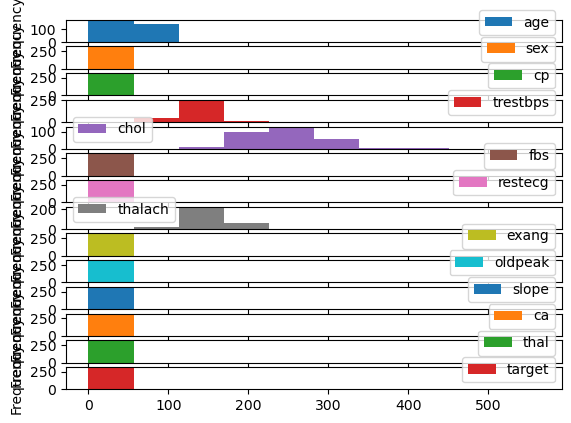

In [ ]:
heart_disease.plot.hist(subplots = True);

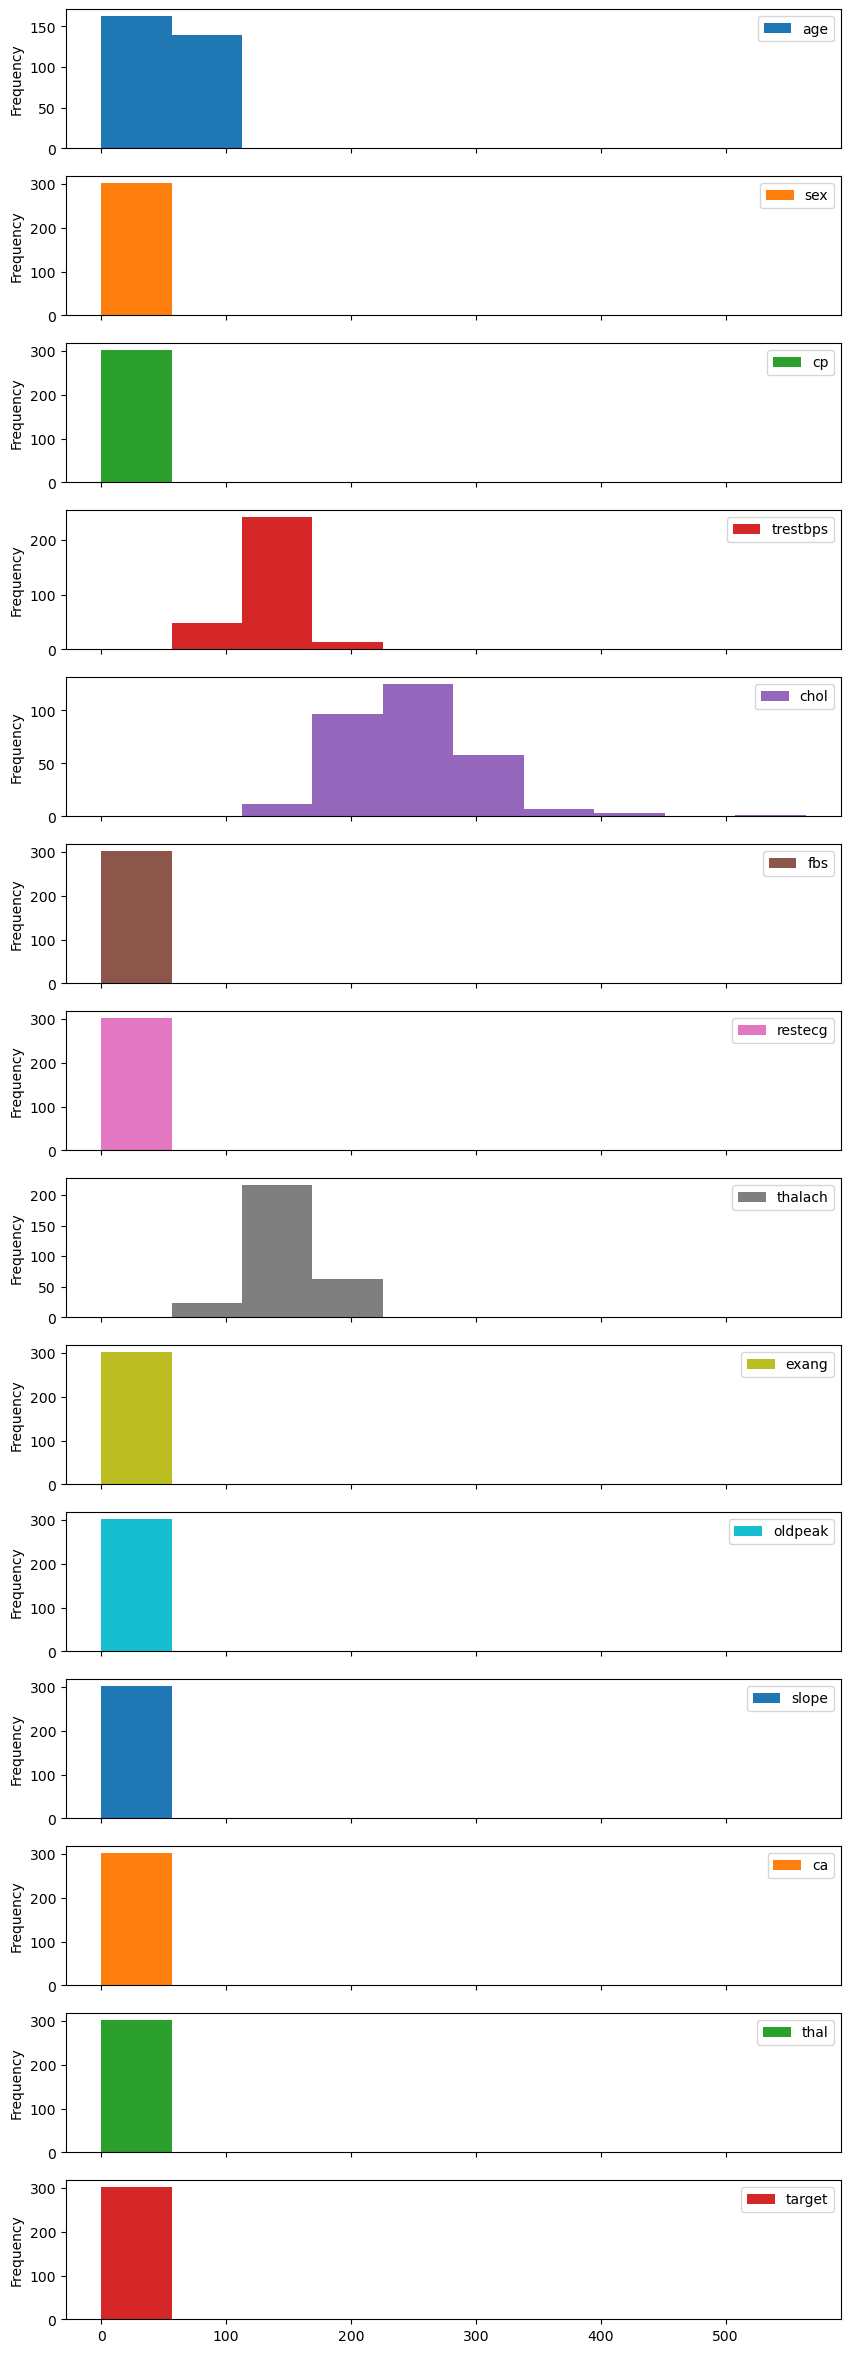

In [ ]:
# Lets fix this over lapping
heart_disease.plot.hist(figsize = (10, 30), subplots = True);

### Which one should you use (pyplot vs matplotlib method ? )
- documentation always says use matplotlib 
- but for quick plot u can use pyplot
- When plotting something advance use OO method

In [ ]:
over_50 = heart_disease[heart_disease["age"]>50]
len(over_50)

208

In [ ]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


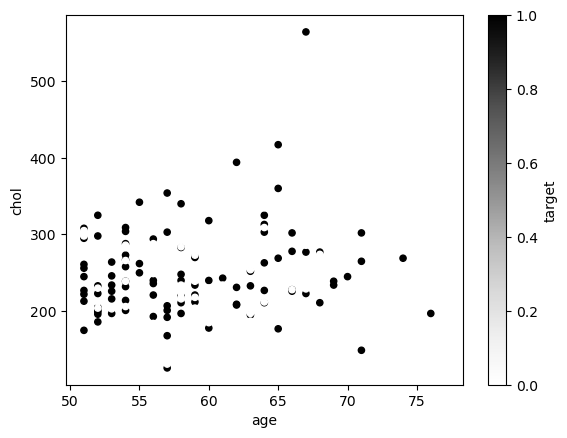

In [ ]:
# pyplot method AKA plotting directly

over_50.plot(kind = "scatter",
             x = "age",
             y = "chol",
             c = 'target');

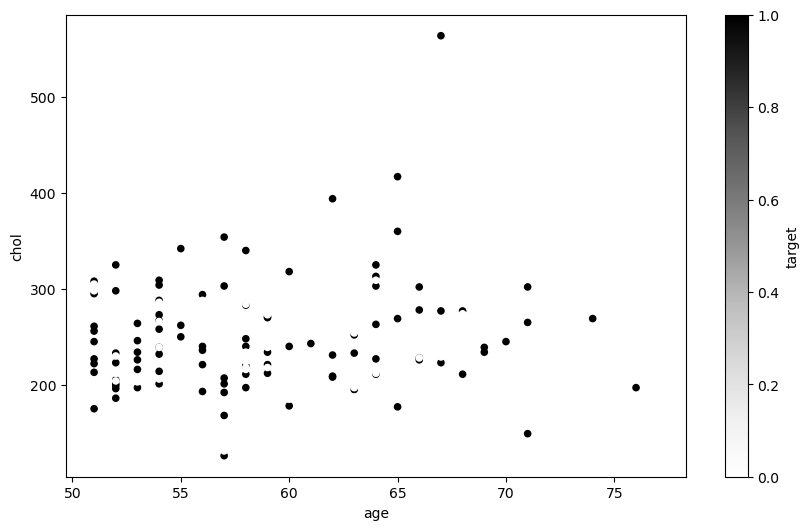

In [ ]:
# OO method with pyplot 

fix, ax = plt.subplots(figsize = (10, 6))
over_50.plot(kind = "scatter",
             x  = 'age',
             y = 'chol',
             c = 'target',
             ax = ax);
# ax.set_xlim([45, 100]);

In [ ]:
over_50['target'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

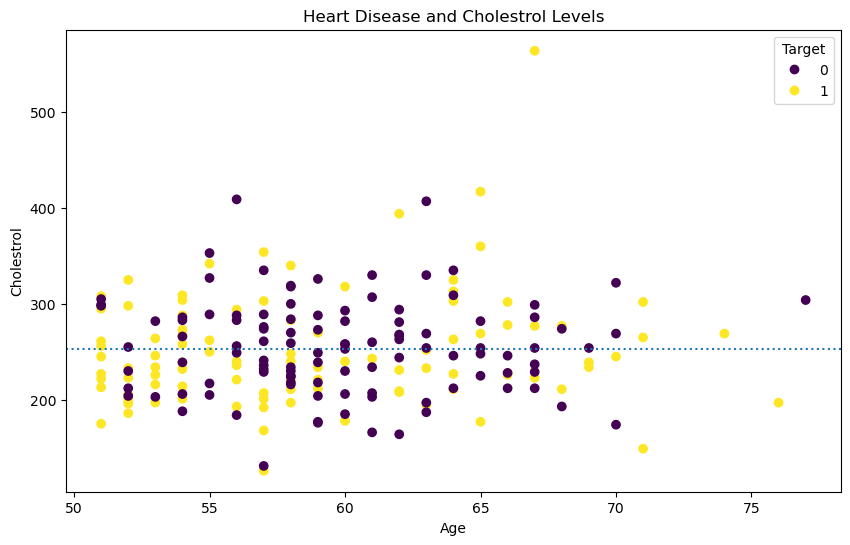

In [ ]:
# OO method From scratch 
fig, ax = plt.subplots(figsize = (10, 6))

# Plot the data
scatter = ax.scatter(x = over_50['age'],
                     y = over_50['chol'],
                     c = over_50['target'])

# Customize the plot
ax.set(title = "Heart Disease and Cholestrol Levels",
       xlabel = "Age",
       ylabel = "Cholestrol")

# Add a Legend
ax.legend(*scatter.legend_elements(), title = "Target")

# Add a Horizontal line
ax.axhline(over_50["chol"].mean(),
           linestyle = ":")

In [ ]:
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


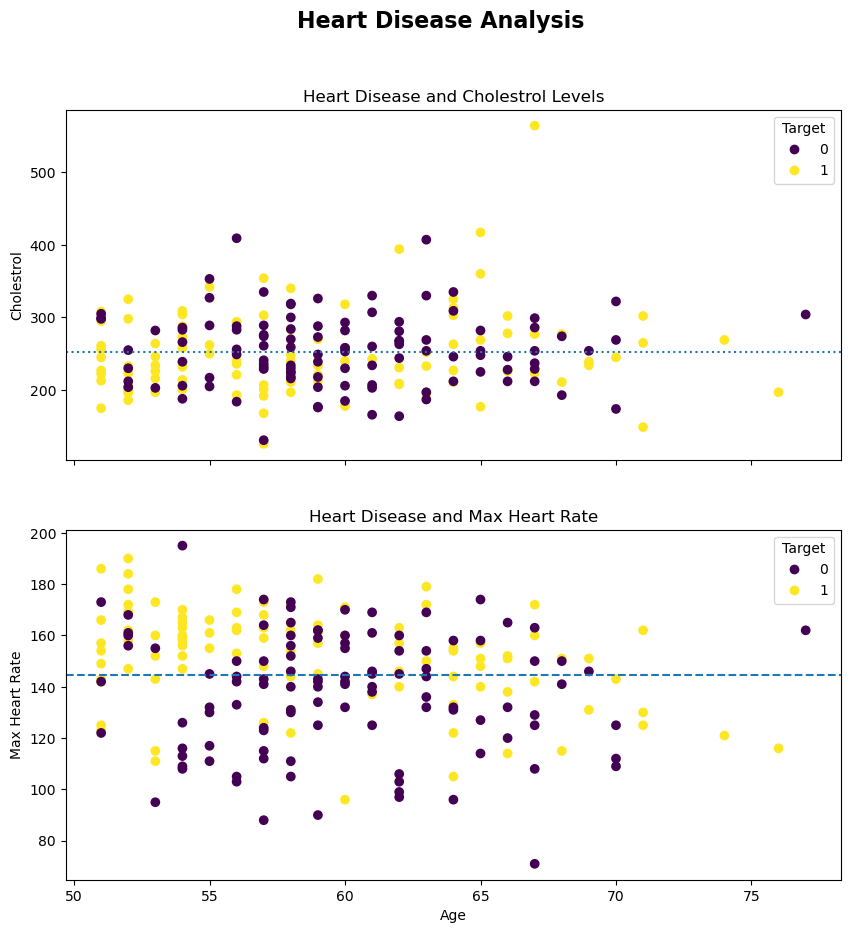

In [ ]:
# Subplots of chol, age, thalach

# OO method From scratch 
fig, (ax0, ax1) = plt.subplots(nrows = 2,
                               ncols = 1, 
                               figsize = (10, 10),
                               sharex = True)

# ---------------------------- For ax0 --------------------------
# Plot the data at ax0
scatter = ax0.scatter(x = over_50['age'],
                     y = over_50['chol'],
                     c = over_50['target'])

# Customize the plot at ax0
ax0.set(title = "Heart Disease and Cholestrol Levels",
       ylabel = "Cholestrol")#xlable = "Age"  sharex = True

# Add a Legend at ax0
ax0.legend(*scatter.legend_elements(), title = "Target")

# Add a Horizontal line at ax0
ax0.axhline(over_50["chol"].mean(),
           linestyle = ":")

# ---------------------------- For ax1 --------------------------
# Plot the data at ax1
scatter = ax1.scatter(x = over_50['age'],
                     y = over_50['thalach'],
                     c = over_50['target'])

# Customize the plot at ax1
ax1.set(title = "Heart Disease and Max Heart Rate",
        xlabel = "Age",
       ylabel = "Max Heart Rate") 

# Add a Legend at ax1
ax1.legend(*scatter.legend_elements(), title = "Target")

# Add a Horizontal line at ax1
ax1.axhline(over_50["thalach"].mean(),
           linestyle = "--")

# Add title to entire figure
fig.suptitle("Heart Disease Analysis", fontsize = 16, fontweight = "bold");

In [ ]:
# See the different stiles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

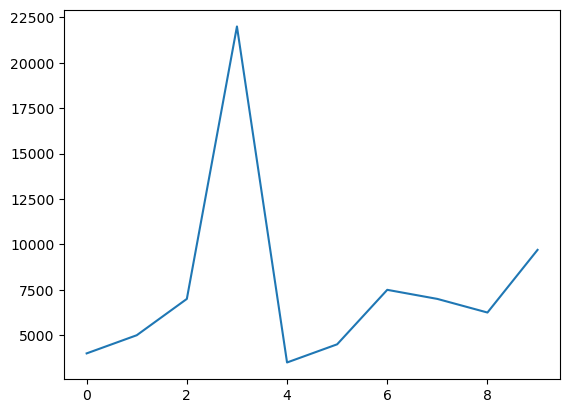

In [ ]:
car_sales['Price'].plot();

C:\Users\Pratik\AppData\Local\Temp\ipykernel_17448\3596764366.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') # converts internally always


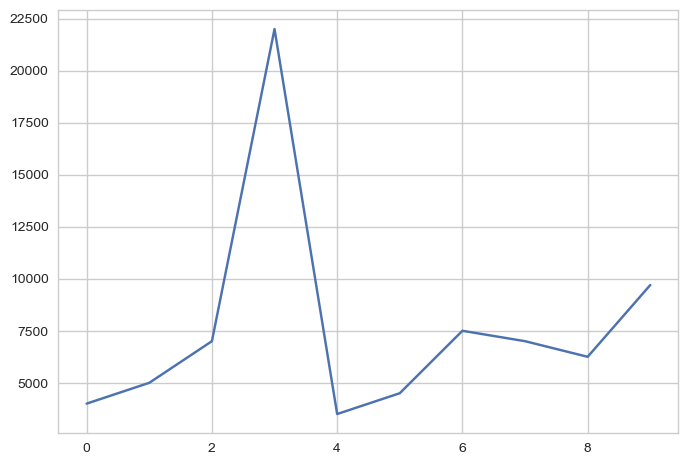

In [ ]:
plt.style.use('seaborn-whitegrid') # converts internally always
car_sales['Price'].plot();

C:\Users\Pratik\AppData\Local\Temp\ipykernel_17448\293999635.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


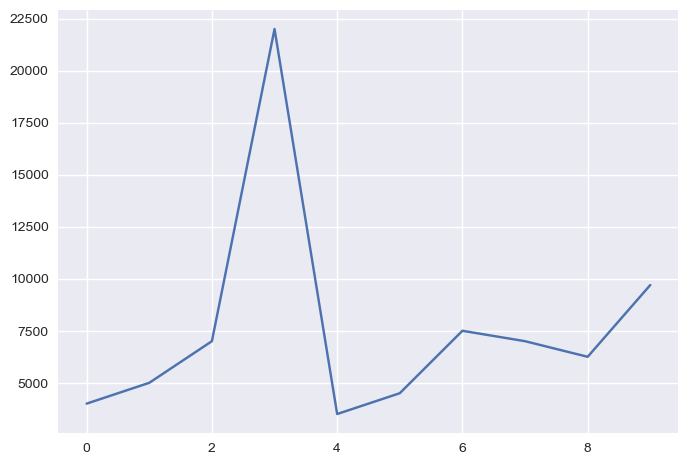

In [ ]:
plt.style.use('seaborn')
car_sales['Price'].plot();

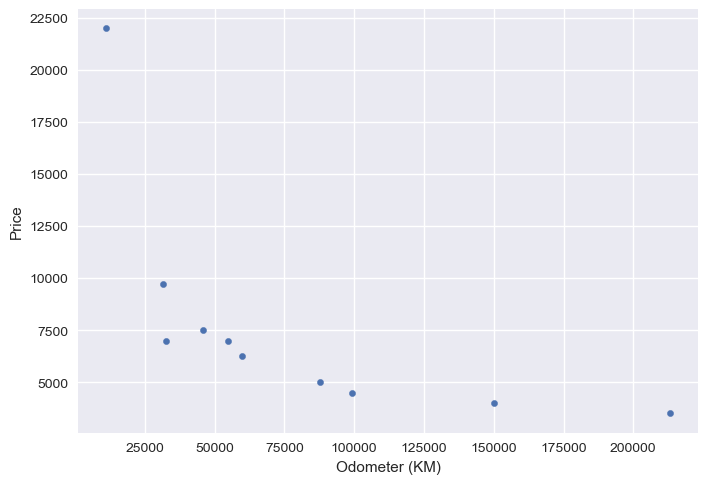

In [ ]:
car_sales.plot(x = "Odometer (KM)", y ="Price", kind = "scatter");

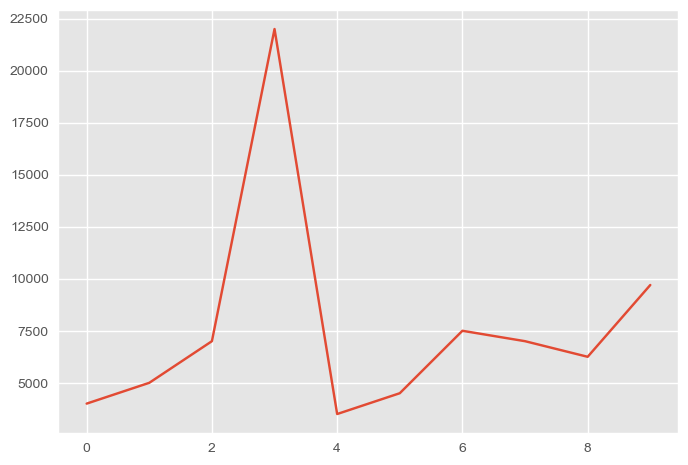

In [ ]:
plt.style.use('ggplot')
car_sales['Price'].plot();

In [ ]:
# Cteate some data
x = np.random.randn(10,4)
x

array([[-0.28890516, -0.20472204, -0.54901001, -0.88033735],
       [-0.54882984,  2.26910955,  1.36413853,  0.11774302],
       [ 0.4141135 ,  0.56203815,  0.35994039,  0.38312477],
       [ 0.8902966 , -1.42239226,  1.71390924, -0.2931528 ],
       [-0.06849006, -0.76585781,  1.95399862,  1.14470087],
       [-0.15722715,  1.62538573, -0.78532481,  0.34970154],
       [-0.70729518,  0.81764111,  0.95602923, -1.52182087],
       [ 0.68629024,  0.39294699, -0.79074483, -0.67963317],
       [-0.62001267, -0.99629781, -0.39256172, -0.36017238],
       [-1.80897749,  0.70178878,  0.2658849 , -0.28599079]])

In [ ]:
df = pd.DataFrame(x, columns = ['aaa', 'bbb', 'ccc', 'ddd'])
df.head()

,aaa,bbb,ccc,ddd
0,-0.288905,-0.204722,-0.549010,-0.880337
1,-0.548830,2.269110,1.364139,0.117743
2,0.414114,0.562038,0.359940,0.383125
3,0.890297,-1.422392,1.713909,-0.293153
4,-0.068490,-0.765858,1.953999,1.144701


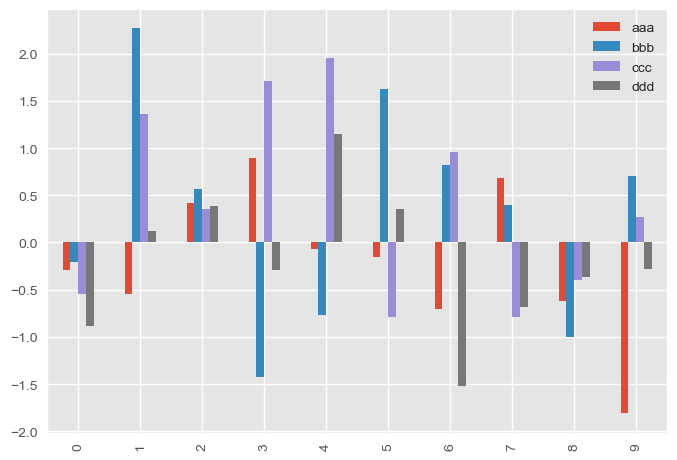

In [ ]:
ax = df.plot(kind = "bar")

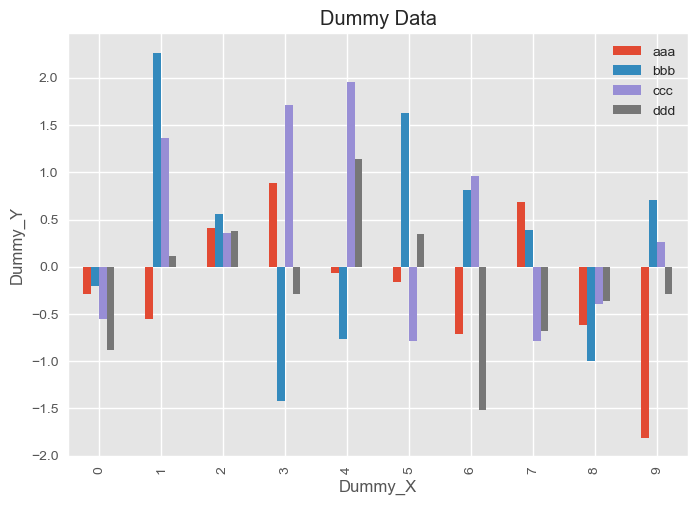

In [ ]:
# Ciustomizr out plot with the set() method
ax = df.plot(kind = "bar")

# Add some label and title
ax.set(title = "Dummy Data",
       xlabel = "Dummy_X",
       ylabel = "Dummy_Y")

# Make a Legend visiable
ax.legend().set_visible(True)

C:\Users\Pratik\AppData\Local\Temp\ipykernel_17448\2587048997.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


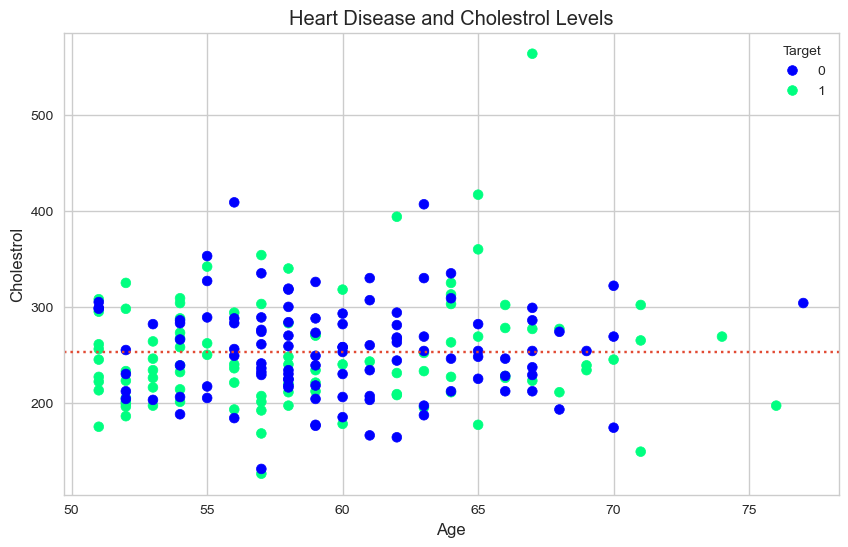

In [ ]:
plt.style.use('seaborn-whitegrid')

# OO method From scratch 
fig, ax = plt.subplots(figsize = (10, 6))

# Plot the data
scatter = ax.scatter(x = over_50['age'],
                     y = over_50['chol'],
                     c = over_50['target'],
                     cmap="winter") # changes colour

# Customize the plot
ax.set(title = "Heart Disease and Cholestrol Levels",
       xlabel = "Age",
       ylabel = "Cholestrol")

# Add a Legend
ax.legend(*scatter.legend_elements(), title = "Target")

# Add a Horizontal line
ax.axhline(over_50["chol"].mean(),
           linestyle = ":")

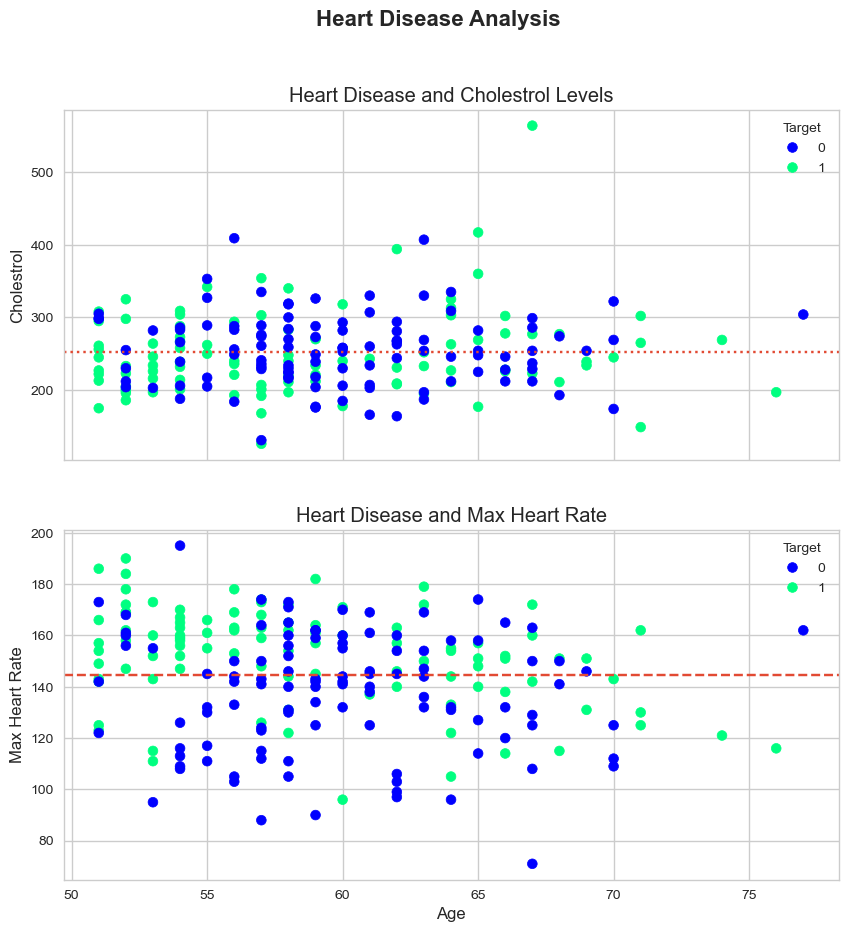

In [ ]:
# customizing y and x axis limitations

# Subplots of chol, age, thalach

# OO method From scratch 
fig, (ax0, ax1) = plt.subplots(nrows = 2,
                               ncols = 1, 
                               figsize = (10, 10),
                               sharex = True)

# ---------------------------- For ax0 --------------------------
# Plot the data at ax0
scatter = ax0.scatter(x = over_50['age'],
                     y = over_50['chol'],
                     c = over_50['target'],
                     cmap = "winter")

# Customize the plot at ax0
ax0.set(title = "Heart Disease and Cholestrol Levels",
       ylabel = "Cholestrol")#xlable = "Age"  sharex = True

# Add a Legend at ax0
ax0.legend(*scatter.legend_elements(), title = "Target")

# Add a Horizontal line at ax0
ax0.axhline(over_50["chol"].mean(),
           linestyle = ":")

# ---------------------------- For ax1 --------------------------
# Plot the data at ax1
scatter = ax1.scatter(x = over_50['age'],
                     y = over_50['thalach'],
                     c = over_50['target'],
                     cmap = "winter")

# Customize the plot at ax1
ax1.set(title = "Heart Disease and Max Heart Rate",
        xlabel = "Age",
       ylabel = "Max Heart Rate") 

# Add a Legend at ax1
ax1.legend(*scatter.legend_elements(), title = "Target")

# Add a Horizontal line at ax1
ax1.axhline(over_50["thalach"].mean(),
           linestyle = "--")

# Add title to entire figure
fig.suptitle("Heart Disease Analysis", fontsize = 16, fontweight = "bold");

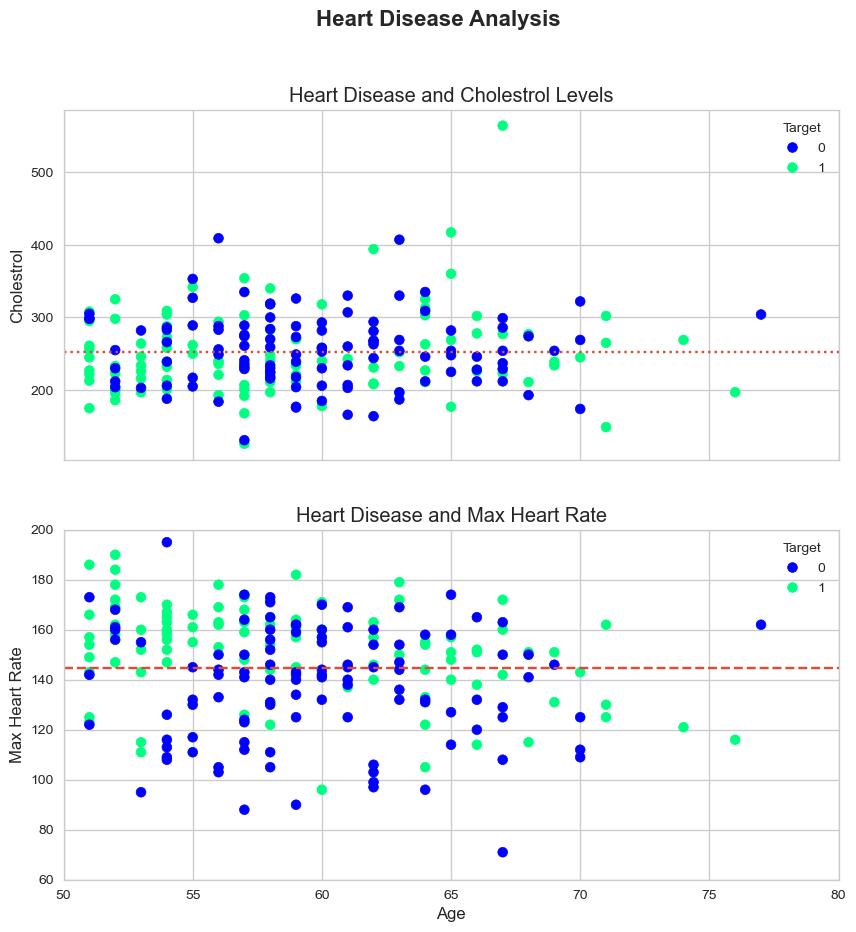

In [ ]:
# customizing y and x axis limitations

# Subplots of chol, age, thalach

# OO method From scratch 
fig, (ax0, ax1) = plt.subplots(nrows = 2,
                               ncols = 1, 
                               figsize = (10, 10),
                               sharex = True)

# ---------------------------- For ax0 --------------------------
# Plot the data at ax0
scatter = ax0.scatter(x = over_50['age'],
                     y = over_50['chol'],
                     c = over_50['target'],
                     cmap = "winter")

# Customize the plot at ax0
ax0.set(title = "Heart Disease and Cholestrol Levels",
       ylabel = "Cholestrol")#xlable = "Age"  sharex = True

# change the x axis limits
ax0.set_xlim([50, 80])

# Add a Legend at ax0
ax0.legend(*scatter.legend_elements(), title = "Target")

# Add a Horizontal line at ax0
ax0.axhline(over_50["chol"].mean(),
           linestyle = ":")

# ---------------------------- For ax1 --------------------------
# Plot the data at ax1
scatter = ax1.scatter(x = over_50['age'],
                     y = over_50['thalach'],
                     c = over_50['target'],
                     cmap = "winter")

# Customize the plot at ax1
ax1.set(title = "Heart Disease and Max Heart Rate",
        xlabel = "Age",
       ylabel = "Max Heart Rate") 

# change the x axis limits
ax1.set_xlim([50, 80])
ax1.set_ylim([60, 200])

# Add a Legend at ax1
ax1.legend(*scatter.legend_elements(), title = "Target")

# Add a Horizontal line at ax1
ax1.axhline(over_50["thalach"].mean(),
           linestyle = "--")

# Add title to entire figure
fig.suptitle("Heart Disease Analysis", fontsize = 16, fontweight = "bold");

## Sharing and Saving 

cheap way to do is 
right click > save image > save as

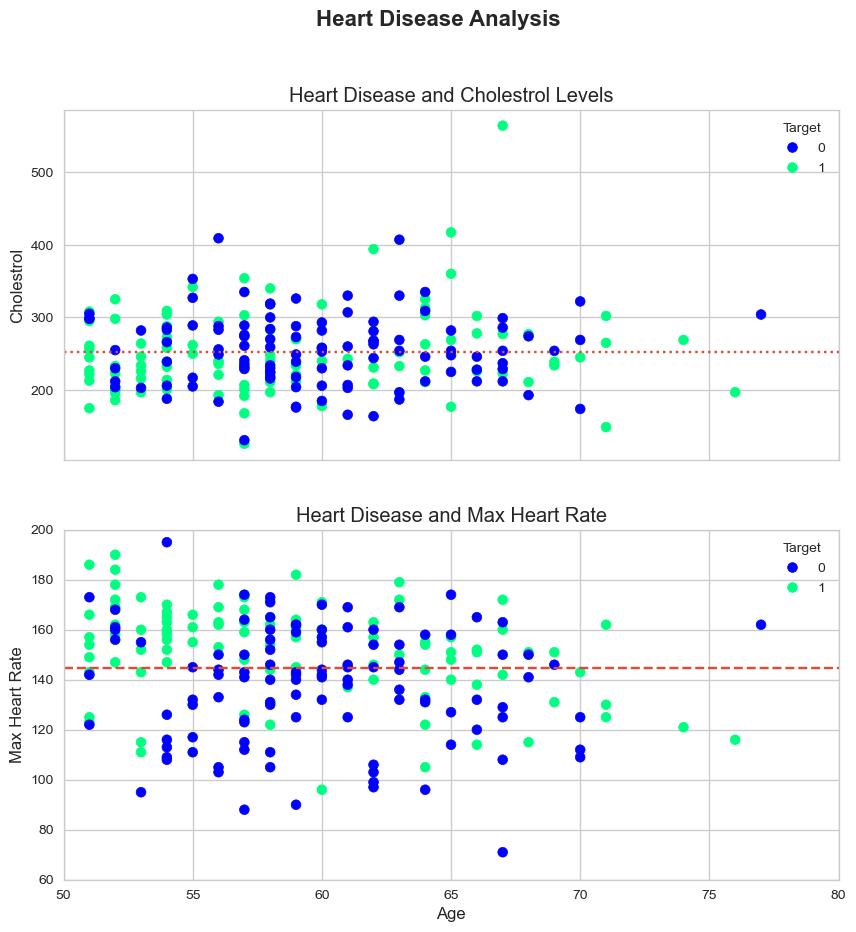

In [ ]:
# with code 
fig

In [ ]:
# code
fig.savefig("Heart-disease-plot-save-with-code.png")

---- END ----